<a href="https://colab.research.google.com/github/zoeera/FMML-projects-and-labs/blob/main/Probability_%26_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Statistics** **and** **Probability**

In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px
import random

# probability of two separate events

In [39]:
def toss_coin(number_of_tosses=200):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=300):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [40]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    114
Tails     86
Name: count, dtype: int64


#Derived Probability Distributions

In [41]:
results = pd.Series([np.sum(toss_coin(40) == 'Heads') for _ in range(2000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

One more example

In [42]:
results = pd.Series([np.sum(toss_coin(400) == 'Heads') for _ in range(8000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

# Regression to the Mean

In [43]:
results = {shots: throw_dice(shots) for shots in [40, 800, 9000, 40000, 800000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

# Problems
If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

In [44]:
ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
num_trials = 10000
num_numbered_cards = sum(1 for _ in range(num_trials) if random.choice(ranks).isdigit())
probability = num_numbered_cards / num_trials
print("Probability of drawing a numbered card:", probability)


Probability of drawing a numbered card: 0.6924


In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

In [45]:
ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]
num_trials = 10000
probability = sum(1 for _ in range(num_trials) if all(random.choice(ranks).isdigit() for _ in range(2))) / num_trials
print("Probability of drawing two numbered cards in a row:", probability)

Probability of drawing two numbered cards in a row: 0.4849


Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

In [46]:
ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King", "Ace"]* 4
num_trials = 10000
def draw_two_cards():
    deck_copy = ranks[:]
    card1 = random.choice(deck_copy)
    deck_copy.remove(card1)
    card2 = random.choice(deck_copy)
    return card1, card2
probability = sum(1 for _ in range(num_trials) if all(card.isdigit() for card in draw_two_cards())) / num_trials
print("Probability of drawing two numbered cards in a row (without replacement):", probability)

Probability of drawing two numbered cards in a row (without replacement): 0.4775


Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

In [47]:
ranks = ["Ace", "2", "3", "4", "5", "6", "7", "8", "9", "10", "Jack", "Queen", "King"]
deck = ranks * 4
num_trials = 10000
probability = sum(1 for _ in range(num_trials) if deck[random.randint(0, 51)].isdigit()) / num_trials
print("Probability of bottom card being numbered:", probability)

Probability of bottom card being numbered: 0.6982


You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

In [48]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        while deck_of_cards:
            picked_card = random.choice(deck_of_cards)
            if picked_card.startswith('A'):
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(f'{cards_thrown} cards were thrown:', ' '.join(deck_of_cards[:cards_thrown + 1]))
        cards_thrown_counts.append(cards_thrown)

    return sum(cards_thrown_counts) / trials, cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')


3 cards were thrown: AH AD AC AS
17 cards were thrown: AH AD AC AS 2D 2C 3H 3S 4H 4C 4S 5H 5C 6H 6C 7H 7D 7C
11 cards were thrown: AH AD AC AS 2H 2C 2S 3D 3S 4H 4D 4C
26 cards were thrown: AH AD AC AS 2H 2C 3H 3S 5C 5S 6S 7D 8H 8D 8C 9H 9C 10H 10C 10S JC QH QD QC KD KS
4 cards were thrown: AH AD AC AS 2H
7 cards were thrown: AH AD AC AS 2H 2D 2C 2S
19 cards were thrown: AH AD AC AS 2H 2C 3H 3D 3C 3S 4H 4D 4S 5H 5D 5C 6C 6S 7H 7C
6 cards were thrown: AH AD AC AS 2H 2C 2S
2 cards were thrown: AH AD AC
1 cards were thrown: AH AD

9.5794 cards are tossed before we see the first ace!


# Probability Mass Function

In [49]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

# Standardisation


In [50]:
grades = pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/grades.csv")
print(grades.shape)
grades = grades.apply(pd.to_numeric, errors='coerce')
statistics = grades.agg(["mean", "var", "std"])
print(statistics)


(16, 9)
      Last name   "First name"   "SSN"          "Test1"      "Test2"  \
mean        NaN            NaN     NaN        43.066667    36.625000   
var         NaN            NaN     NaN        21.780952  1719.183333   
std         NaN            NaN     NaN         4.667007    41.463036   

          "Test3"      "Test4"     "Final"   "Grade"  
mean    61.750000    59.250000   51.000000       NaN  
var   1279.400000  1029.666667  500.285714       NaN  
std     35.768701    32.088420   22.367068       NaN  


# Binomial distribution

In [51]:
from scipy.stats import binom
binom.pmf(k=6, n=6, p=0.25)
1 - binom.pmf(k=3, n=4, p=0.75) - binom.pmf(k=6, n=6, p=0.75)
binom.cdf(4, n=5, p=0.75)

0.7626953125

# Normal distribution
1)The mean, median and mode of the distribution is the same.

2)The curve is bell-shaped.

3)The total area under the curve is 1.

4)Symmetric about the mean.




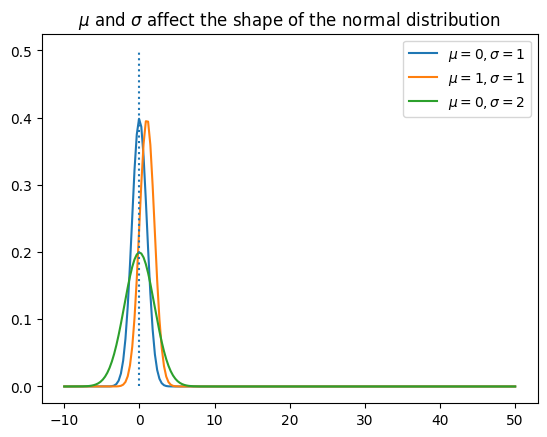

In [52]:
from scipy.stats import norm
x = np.linspace(-10, 50, 200)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

# Poisson distribution

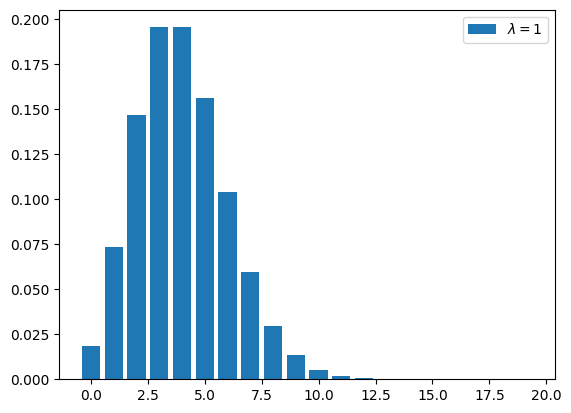

In [53]:
from scipy.stats import poisson
x = np.arange(20)
f1 = poisson.pmf(x, mu=4)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=5)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [54]:
x @ f1


3.9999997936486373

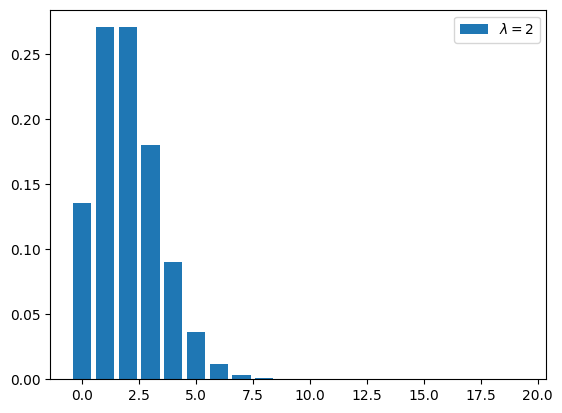

In [55]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [56]:
x @ f2

1.9999999999987046

# Central Limit Theorem

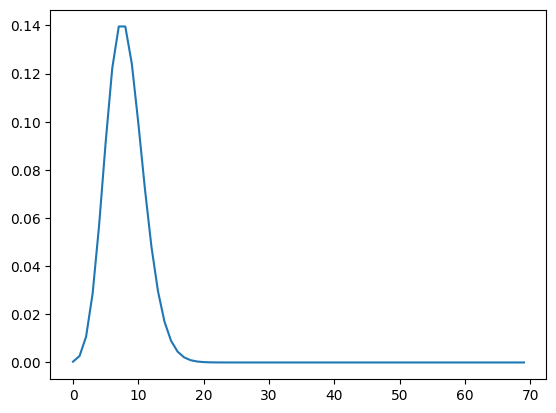

In [57]:
from scipy.stats import poisson
bins = np.arange(0, 70)
p_pois = poisson.pmf(bins, mu=8)
plt.plot(bins, p_pois)

(array([ 11.,  46., 108., 216., 211., 167., 101.,  27.,   9.,   4.]),
 array([10.55555556, 10.88666667, 11.21777778, 11.54888889, 11.88      ,
        12.21111111, 12.54222222, 12.87333333, 13.20444444, 13.53555556,
        13.86666667]),
 <BarContainer object of 10 artists>)

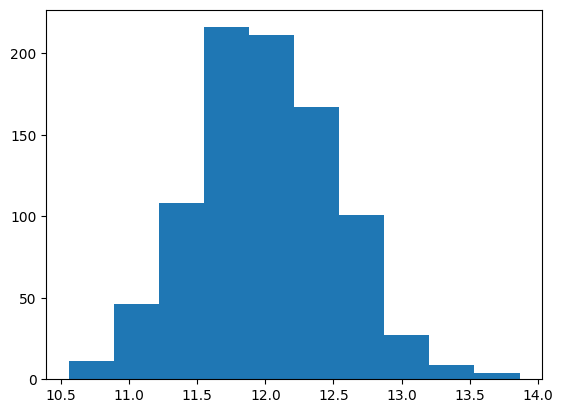

In [58]:
def sample_pois(_):
    samples = poisson.rvs(mu=12, size=45)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(900)))
plt.hist(means)

(array([ 23.,  53., 120., 222., 205., 160.,  88.,  24.,   4.,   1.]),
 array([10.6       , 10.93777778, 11.27555556, 11.61333333, 11.95111111,
        12.28888889, 12.62666667, 12.96444444, 13.30222222, 13.64      ,
        13.97777778]),
 <BarContainer object of 10 artists>)

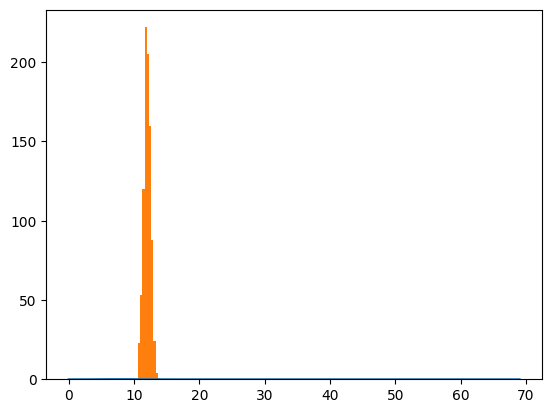

In [59]:
from scipy.stats import poisson
bins = np.arange(0, 70)
p_pois = poisson.pmf(bins, mu=8)
plt.plot(bins, p_pois)
def sample_pois(_):
    samples = poisson.rvs(mu=12, size=45)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(900)))
plt.hist(means)